# Creating DOCX objects from XML fragments

In [5]:
import docx
from docx.oxml import parse_xml
from docx.oxml.ns import nsdecls
from lxml import etree

doc = docx.Document()
# Add a heading
doc.add_heading('Test Document', level=1)


# Add a paragraph
# This XML string is a paragraph with two runs. The second run has a style applied.
# Examples: https://github.com/python-openxml/python-docx/tree/master/docs/dev/analysis/features

xml_string = """
	<w:p xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main">
		<w:r>
			<w:t>Hello, </w:t>
		</w:r>
		<w:r>
		<w:rPr>
			<w:rStyle w:val="Emphasis"/>
		</w:rPr>
			<w:t>world!</w:t>
		</w:r>
	</w:p>
"""

# Parse the XML string
root = parse_xml(xml_string)

# Append the root to the element of the document
doc.element.body.append(root)

# Save the document
doc.save('test.docx')

# Cellpadding

## Rowspan

In python-docx, you can merge cells vertically to simulate the effect of rowspan in HTML. Here's how you can do it:

In [1]:
import docx

# Create a new Document
doc = docx.Document()

# Add a table
table = doc.add_table(rows=3, cols=3)

# Merge cells
cell_1 = table.cell(0, 0)
cell_2 = table.cell(2, 0)
cell_1.merge(cell_2)

# Save the document
doc.save('test.docx')

## Colspan

In this code, `table.cell(0, 0)` and `table.cell(2, 0)` are used to get the first cell of the first and third `rows. cell_1.merge(cell_2)` is then used to merge these cells, effectively creating a cell with rowspan="3".

Please note that this will only merge the cells vertically. If you want to merge cells horizontally (i.e., create a cell with colspan), you can use the same method but with cells from the same row.


In [2]:
import docx 
# Create a new Document
doc = docx.Document()

# Add a table
table = doc.add_table(rows=3, cols=3)

# Merge cells
cell_1 = table.cell(0, 0)
cell_2 = table.cell(0, 2)
cell_1.merge(cell_2)

# Save the document
doc.save('test.docx')

In [5]:
import docx
from docx.enum.table import WD_TABLE_ALIGNMENT
from bs4 import BeautifulSoup, NavigableString
from lxml import etree

docx_doc = docx.Document()

htbl = '''
<table>
	<tr>
		<th>Row 1, Column 1</th>
		<th>Row 1, Column 2</th>
		<th>Row 1, Column 3</th>
	</tr>
	<tr>
		<td>Row 2, Column 1</td>
		<td rowspan="2">Row 2, Column 2</td>
		<td>Row 2, Column 3</td>
	</tr>
	<tr>
		<td>Row 3, Column 1</td>
		<td>Row 3, Column 2</td>
		<td>Row 3, Column 3</td>
	</tr>
</table>
'''

element = BeautifulSoup(htbl, 'html.parser')

rows = element.find_all('tr')
cols = rows[0].find_all(['td','th'])
table = docx_doc.add_table(rows=len(rows), cols=len(cols))
table.style = 'Table Grid'
table.alignment = docx.enum.table.WD_TABLE_ALIGNMENT.CENTER
r=-1
for row in rows:
	r+=1
	cells = row.find_all(['td','th'])
	for i, cl in enumerate(cells):
		if cl.has_attr('rowspan'):
			for k in range(int(cl['rowspan'])-1):
				table.cell(r+k+1,i).text = cl.text
				# CAVE: This does not work correctly!!!
				table.cell(r+k+1,i).merge(table.cell(r,i))
		else:
			table.cell(r,i).text = cl.text
		if cl.name == 'th':
			table.cell(r,i).paragraphs[0].runs[0].bold = True

# Save the document
docx_doc.save('test.docx')

HINT: You can use the `cell.merge()` method to merge cells horizontally. For example, `table.cell(0, 0).merge(table.cell(0, 2))` will merge the first three cells of the first row, creating a cell with colspan="3".

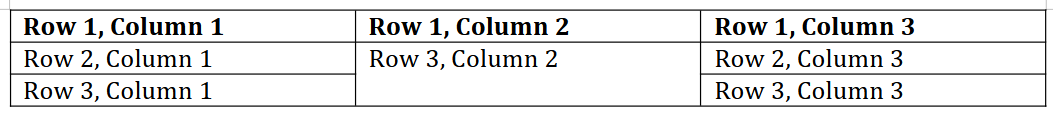
